<div style=" background-color: #BED1CF;" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec Python
</h2>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie NumPy
import numpy as np

#Importation de la librairie matplotlib 
import matplotlib.pyplot as plt

#Importation de la librairie seaborn 
import seaborn as sns

#Importation de differente librairies pour effectuer nos analyses (Normalisation,CAH,K-means,ACP)

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as sch

from matplotlib.colors import ListedColormap

In [2]:
#Importation du fichier DFLapoule.csv

DFLapoule = pd.read_csv('DFLapoule.csv')

In [3]:
# Afficher DFLapoule

DFLapoule

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
0,Afghanistan,57.0,29.0,28.0,1.53,36296113.0,534.0,-2.80,1.95,0.0,9.0
1,Afrique du Sud,2118.0,514.0,1667.0,35.69,57009756.0,6723.0,-0.28,3.38,4.0,5.0
2,Albanie,47.0,38.0,13.0,16.36,2884169.0,4521.0,0.38,2.66,18.8,8.0
3,Algérie,277.0,2.0,275.0,6.38,41389189.0,4134.0,-0.92,2.45,31.1,2.0
4,Allemagne,1739.0,842.0,1514.0,19.47,82658409.0,44670.0,0.59,4.20,21.4,6.0
...,...,...,...,...,...,...,...,...,...,...,...
140,Émirats arabes unis,412.0,433.0,48.0,43.47,9487203.0,43063.0,0.62,3.96,14.1,2.0
141,Équateur,341.0,0.0,340.0,19.31,16785361.0,6246.0,-0.07,2.88,13.7,1.0
142,États-Unis,18266.0,123.0,21914.0,55.68,325084756.0,59468.0,0.29,3.89,9.8,11.0
143,Éthiopie,14.0,1.0,14.0,0.13,106399924.0,709.0,-1.68,2.38,12.4,3.0


In [4]:
# Mettre en index la variable pays

DFLapoule.set_index('Pays', inplace=True)

DFLapoule

,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
Pays,,,,,,,,,,
Afghanistan,57.0,29.0,28.0,1.53,36296113.0,534.0,-2.80,1.95,0.0,9.0
Afrique du Sud,2118.0,514.0,1667.0,35.69,57009756.0,6723.0,-0.28,3.38,4.0,5.0
Albanie,47.0,38.0,13.0,16.36,2884169.0,4521.0,0.38,2.66,18.8,8.0
Algérie,277.0,2.0,275.0,6.38,41389189.0,4134.0,-0.92,2.45,31.1,2.0
Allemagne,1739.0,842.0,1514.0,19.47,82658409.0,44670.0,0.59,4.20,21.4,6.0
...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,412.0,433.0,48.0,43.47,9487203.0,43063.0,0.62,3.96,14.1,2.0
Équateur,341.0,0.0,340.0,19.31,16785361.0,6246.0,-0.07,2.88,13.7,1.0
États-Unis,18266.0,123.0,21914.0,55.68,325084756.0,59468.0,0.29,3.89,9.8,11.0


<div style="background-color: #FFE4C9; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">1-Analyses des données</h1>
</div>

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.1-Normalisation des données</h1>
</div>

In [5]:
# Initialiser la normalisation
scaler = StandardScaler()

# Appliquer la normalisation aux colonnes numériques
normal_num = scaler.fit_transform(DFLapoule)

# Convertir le résultat en DataFrame
normal_DFLapoule = pd.DataFrame(normal_num, columns=DFLapoule.columns ,index=DFLapoule.index)

normal_DFLapoule

,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
Pays,,,,,,,,,,
Afghanistan,-0.315485,-0.360649,-0.302367,-1.218453,-0.082935,-0.708662,-2.910531,-1.689498,-1.656839,1.177417
Afrique du Sud,0.564068,2.092692,0.312028,1.202354,0.042453,-0.395145,-0.136500,0.879000,-1.285795,-0.135856
Albanie,-0.319752,-0.315123,-0.307990,-0.167500,-0.285190,-0.506692,0.590032,-0.414230,0.087067,0.849099
Algérie,-0.221598,-0.497227,-0.209776,-0.874749,-0.052104,-0.526297,-0.841016,-0.791422,1.228027,-1.120811
Allemagne,0.402326,3.751858,0.254674,0.052896,0.197715,1.527140,0.821201,2.351844,0.328246,0.192462
...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,-0.163985,1.682959,-0.294869,1.753697,-0.245220,1.445734,0.854225,1.920768,-0.348909,-1.120811
Équateur,-0.194285,-0.507344,-0.185411,0.041557,-0.201041,-0.419309,0.094669,-0.019076,-0.386013,-1.449129
États-Unis,7.455395,0.114844,7.901804,2.618979,1.665218,2.276764,0.490959,1.795037,-0.747781,1.834054


<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.2- Classification Ascendante Hiérarchique (CAH)</h1>
</div>

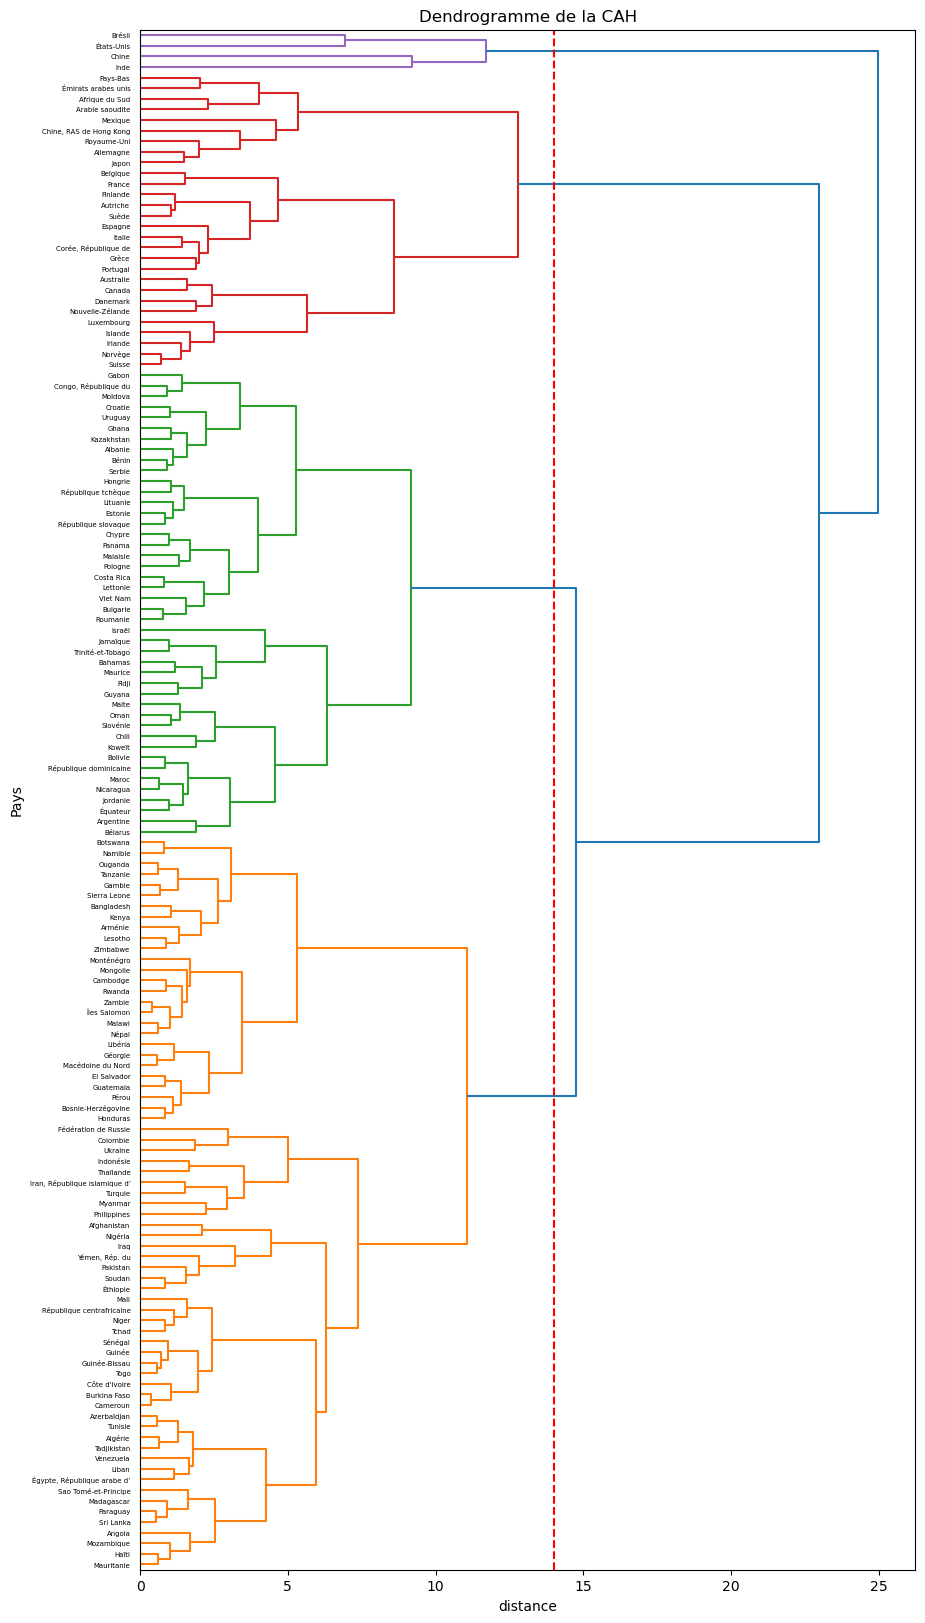

,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12),Cluster CAH
Pays,,,,,,,,,,,
Afghanistan,57.0,29.0,28.0,1.53,36296113.0,534.0,-2.80,1.95,0.0,9.0,4
Afrique du Sud,2118.0,514.0,1667.0,35.69,57009756.0,6723.0,-0.28,3.38,4.0,5.0,2
Albanie,47.0,38.0,13.0,16.36,2884169.0,4521.0,0.38,2.66,18.8,8.0,3
Algérie,277.0,2.0,275.0,6.38,41389189.0,4134.0,-0.92,2.45,31.1,2.0,4
Allemagne,1739.0,842.0,1514.0,19.47,82658409.0,44670.0,0.59,4.20,21.4,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,412.0,433.0,48.0,43.47,9487203.0,43063.0,0.62,3.96,14.1,2.0,2
Équateur,341.0,0.0,340.0,19.31,16785361.0,6246.0,-0.07,2.88,13.7,1.0,3
États-Unis,18266.0,123.0,21914.0,55.68,325084756.0,59468.0,0.29,3.89,9.8,11.0,1


In [6]:
# Effectuer la CAH
linked = linkage(normal_DFLapoule, method='ward')

# dendrogramme
plt.figure(figsize=(10, 20))
dendrogram(linked,
           orientation='right',
           distance_sort='descending',
           labels=normal_DFLapoule.index, 
           show_leaf_counts=True,
           color_threshold=14)
plt.title('Dendrogramme de la CAH')
plt.xlabel('distance')
plt.ylabel('Pays')
plt.axvline(x=14, color='r', linestyle='--')
plt.show()

# choix de la distance
cut_distance = 14 
clusters = sch.fcluster(linked, cut_distance, criterion='distance')


DFLapoule['Cluster CAH'] = clusters

DFLapoule

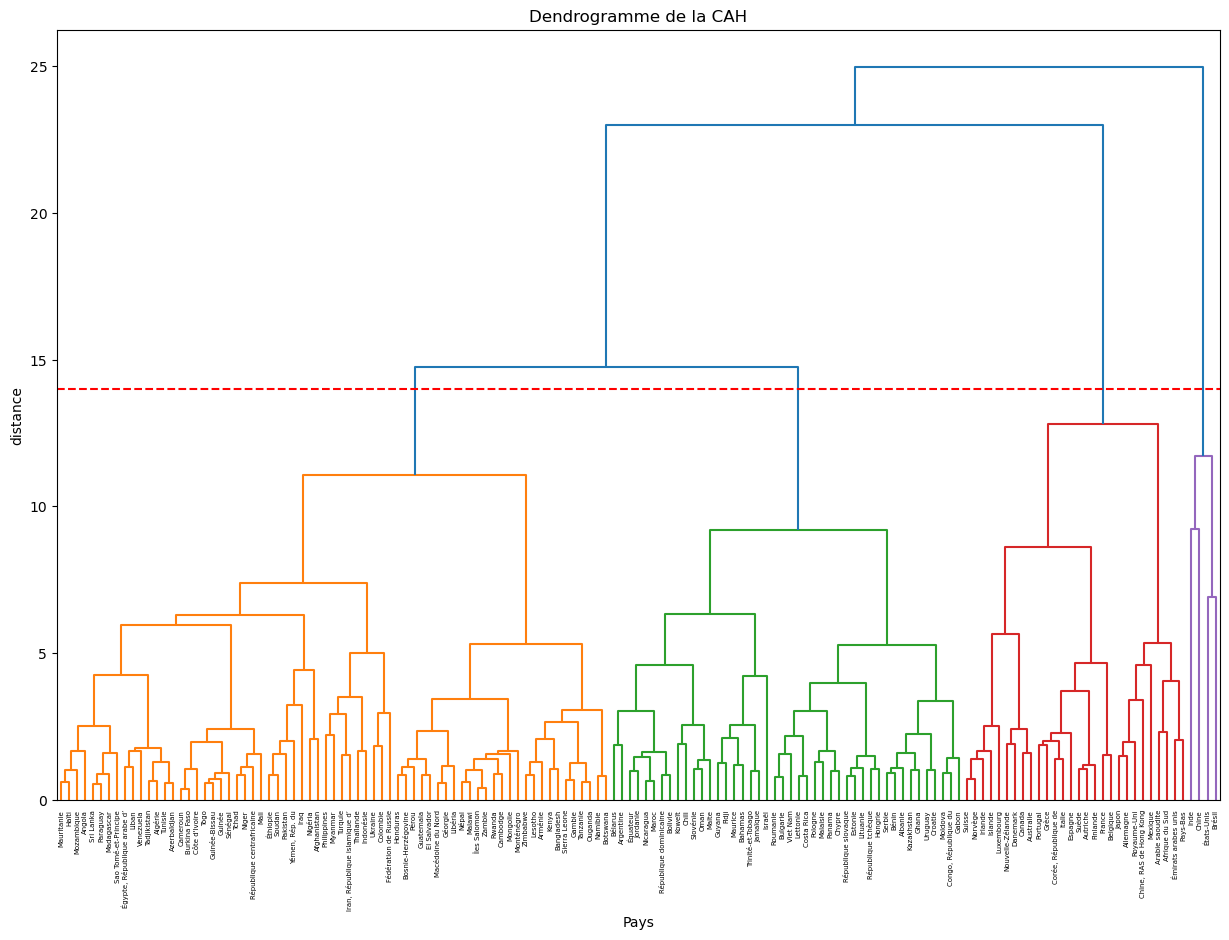

In [7]:
# dendrogramme
plt.figure(figsize=(15, 10))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           labels=normal_DFLapoule.index, 
           show_leaf_counts=True,
           color_threshold=14)
plt.title('Dendrogramme de la CAH')
plt.xlabel('Pays')
plt.ylabel('distance')
plt.axhline(y=14, color='r', linestyle='--')
plt.show()

In [8]:
# Afficher les groupes de pays des différents clusters

for cluster_id in set(clusters):
    print(f"Cluster {cluster_id}:")
    print(DFLapoule[DFLapoule['Cluster CAH'] == cluster_id].index.tolist())
    print()

Cluster 1:
['Brésil', 'Chine', 'Inde', 'États-Unis']

Cluster 2:
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Australie', 'Autriche', 'Belgique', 'Canada', 'Chine, RAS de Hong Kong', 'Danemark', 'Espagne', 'Finlande', 'France', 'Grèce', 'Irlande', 'Islande', 'Italie', 'Japon', 'Luxembourg', 'Mexique', 'Norvège', 'Nouvelle-Zélande', 'Pays-Bas', 'Portugal', 'Royaume-Uni', 'Corée, République de', 'Suisse', 'Suède', 'Émirats arabes unis']

Cluster 3:
['Albanie', 'Argentine', 'Bahamas', 'Bolivie', 'Bulgarie', 'Bélarus', 'Bénin', 'Chili', 'Chypre', 'Congo, République du', 'Costa Rica', 'Croatie', 'Estonie', 'Fidji', 'Gabon', 'Ghana', 'Guyana', 'Hongrie', 'Israël', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Koweït', 'Lettonie', 'Lituanie', 'Malaisie', 'Malte', 'Maroc', 'Maurice', 'Nicaragua', 'Oman', 'Panama', 'Pologne', 'Roumanie', 'Moldova', 'République dominicaine', 'Serbie', 'République slovaque', 'Slovénie', 'République tchèque', 'Trinité-et-Tobago', 'Uruguay', 'Viet Nam', 'Équateur']

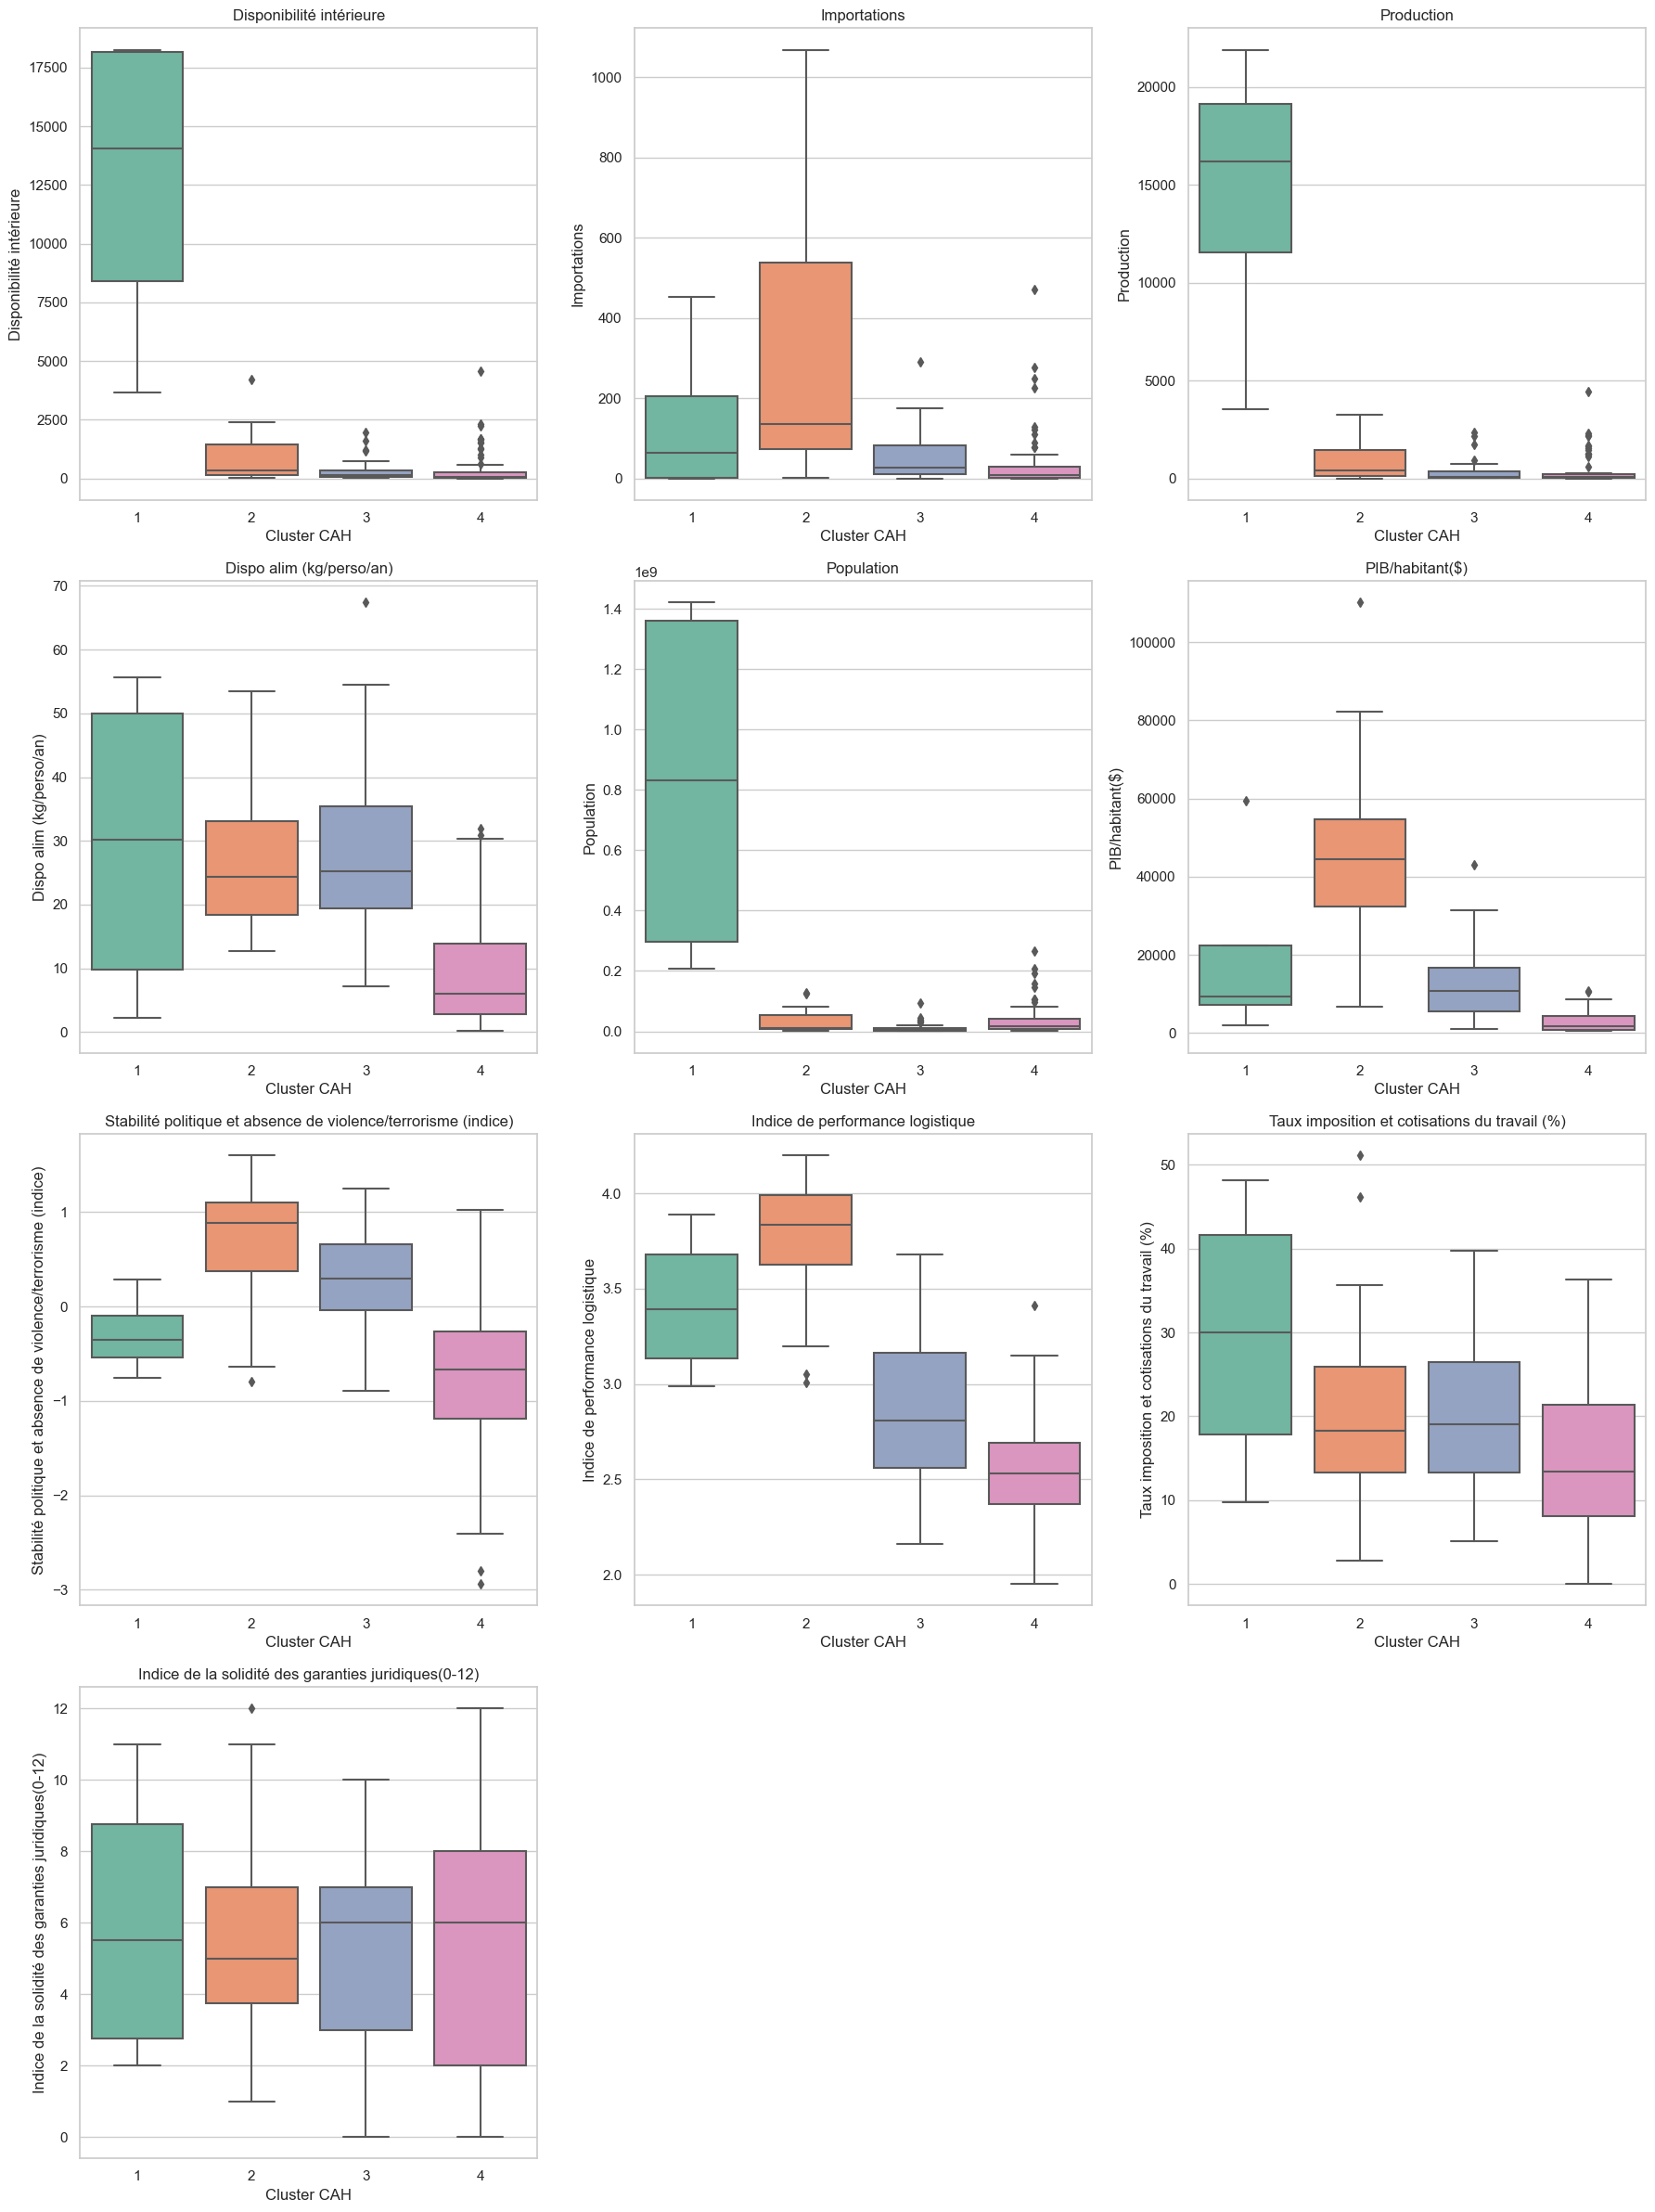

In [9]:
sns.set(style="whitegrid")

# Tracer les boxplots pour chaque variable
num_cols = 3  
num_vars = len(DFLapoule.columns) - 1  
num_rows = (num_vars + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))

# Aplatir le tableau d'axes pour une itération facile
axes = axes.flatten()

for i, col in enumerate(DFLapoule.columns[:-1]):  
    sns.boxplot(x='Cluster CAH', y=col, data=DFLapoule, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col}')

# Supprimer les axes inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

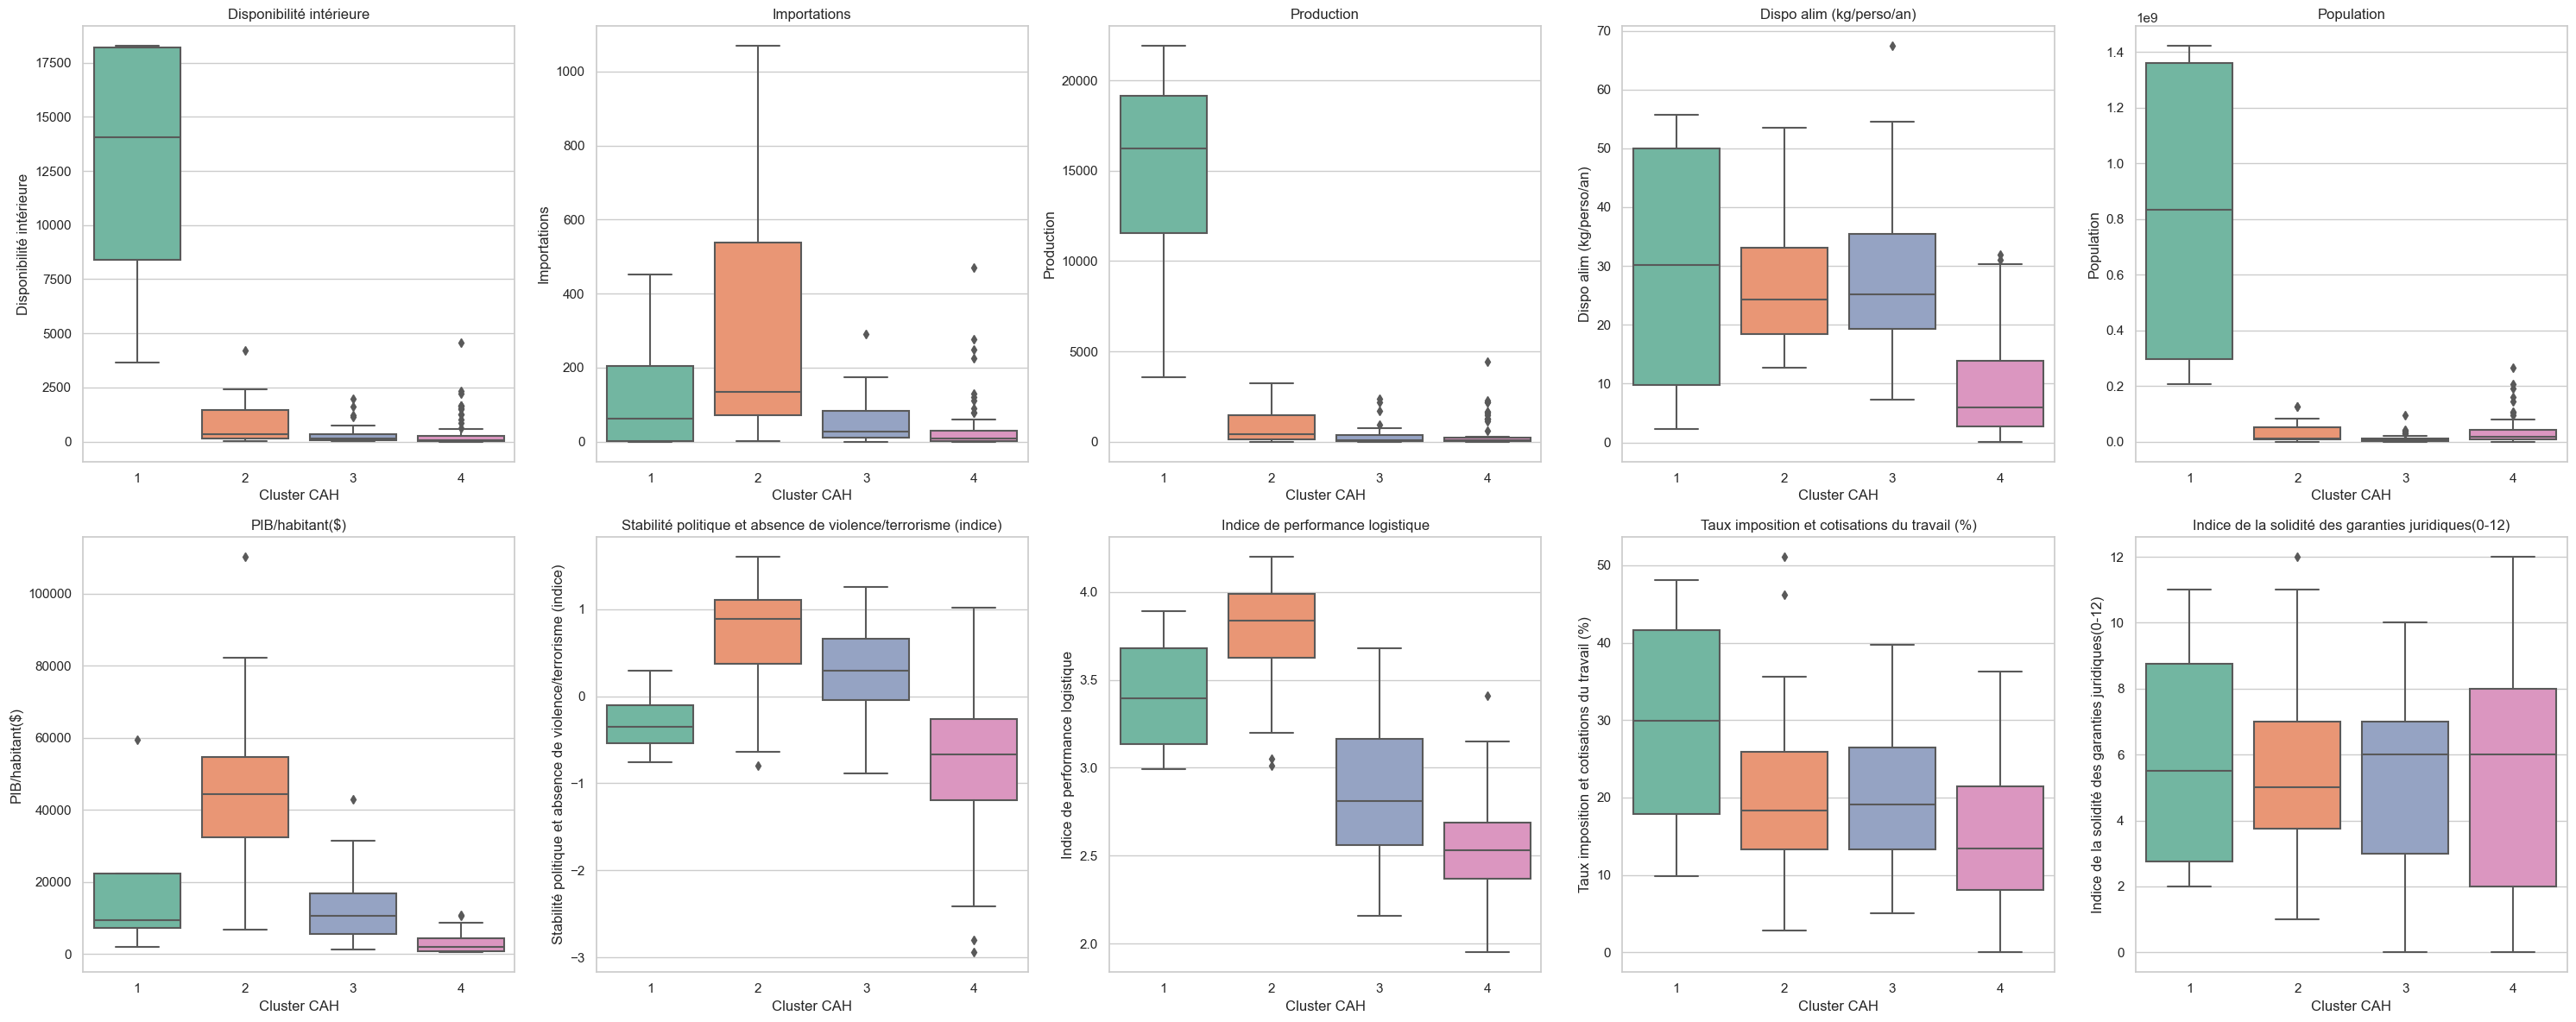

In [10]:
sns.set(style="whitegrid")

# Tracer les boxplots pour chaque variable
num_cols = 5  
num_vars = len(DFLapoule.columns) - 1  
num_rows = (num_vars + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))

# Aplatir le tableau d'axes pour une itération facile
axes = axes.flatten()

for i, col in enumerate(DFLapoule.columns[:-1]):  
    sns.boxplot(x='Cluster CAH', y=col, data=DFLapoule, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col}')

# Supprimer les axes inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 Cluster 1

- Énorme disponibilité intérieure/Production/Consommation/Population.

Cluster 2

- Forte importation, PIB (par habitant) élevé, très bon indice de stabilité politique, logistique et juridique, avec des taux d'imposition sur les sociétés intéressants.

Cluster 3

- Faible importation, PIB (par habitant) faible, bonne stabilité politique, des chiffres très corrects pour les différents indices et un taux d'imposition intéressant.

Cluster 4

- Ce cluster regroupe des pays en difficulté, loin derrière sur la majorité des indicateurs. Cependant, on peut noter que quelques exceptions s'en sortent bien par rapport à la majorité des pays de ce cluster.

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.3- méthode des k-means</h1>
</div>

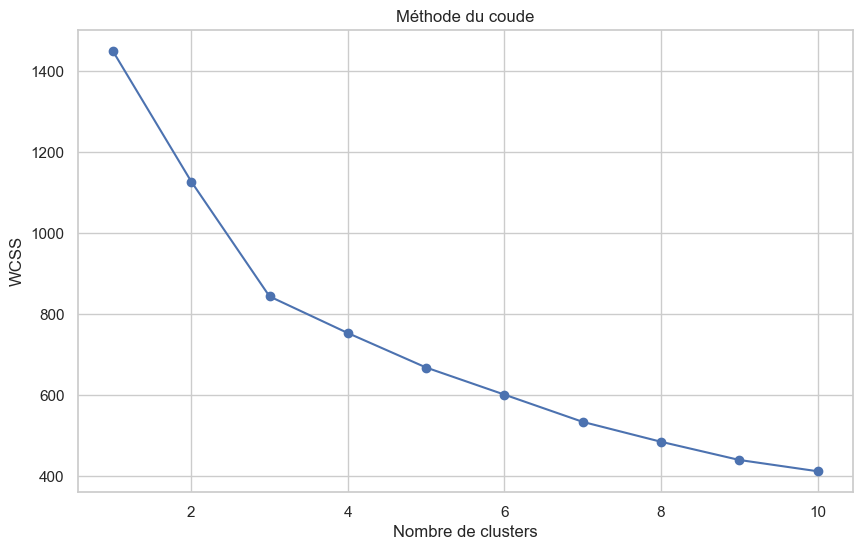

In [11]:
# Méthode du coude pour déterminer le nombre de clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normal_DFLapoule)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()


In [12]:
# Application de K-means avec le nombre optimal de clusters

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(normal_DFLapoule)+1
DFLapoule['Cluster K-mean'] = clusters

In [13]:
# Affichage des groupes de pays des différents clusters

for cluster_id in set(clusters):
    print(f"Cluster {cluster_id}:")
    print(DFLapoule[DFLapoule['Cluster K-mean'] == cluster_id].index.tolist())
    print()

Cluster 1:
['Brésil', 'Chine', 'Inde', 'États-Unis']

Cluster 2:
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine', 'Australie', 'Autriche', 'Bahamas', 'Belgique', 'Bulgarie', 'Canada', 'Chili', 'Chine, RAS de Hong Kong', 'Chypre', 'Costa Rica', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Fédération de Russie', 'Grèce', 'Hongrie', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque', 'Japon', 'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg', 'Malaisie', 'Malte', 'Maurice', 'Mexique', 'Norvège', 'Nouvelle-Zélande', 'Oman', 'Panama', 'Pays-Bas', 'Pologne', 'Portugal', 'Roumanie', 'Royaume-Uni', 'Corée, République de', 'République slovaque', 'Slovénie', 'Suisse', 'Suède', 'République tchèque', 'Trinité-et-Tobago', 'Viet Nam', 'Émirats arabes unis']

Cluster 3:
['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Bolivie', 'Bosnie-Herzégovine', 'Botswana', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cambodge', 'Cameroun', 'Colombie', 'Co

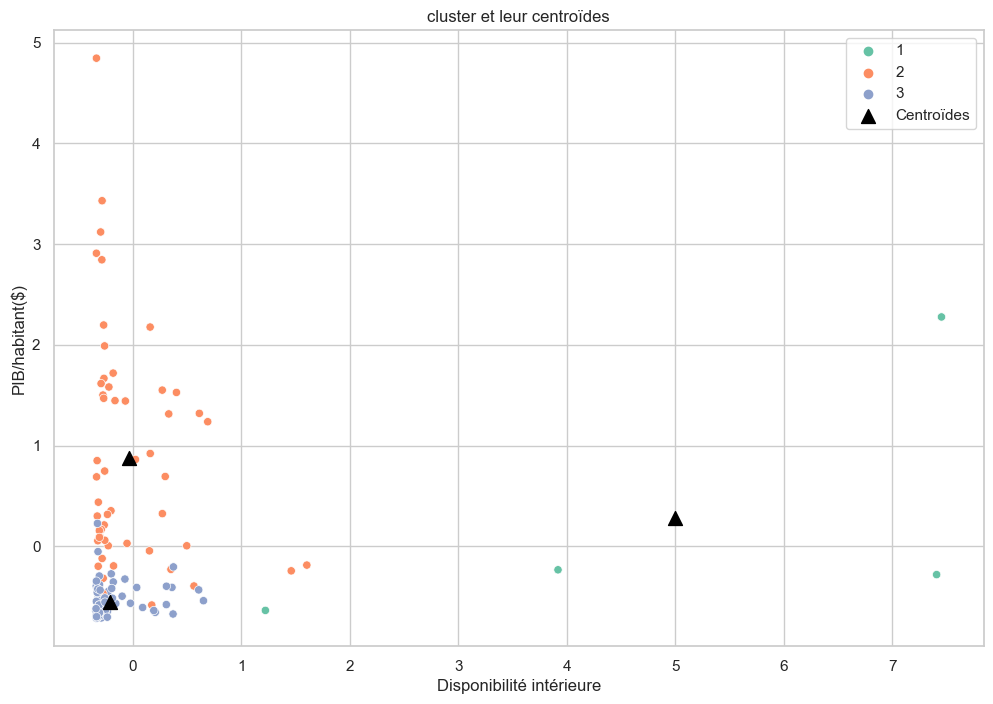

In [36]:
plt.figure(figsize=(12, 8))

x_col = normal_DFLapoule.columns[0]
y_col = normal_DFLapoule.columns[5]

# Création d'une copie du DataFrame normalisé et ajouter les clusters pour la visualisation
normal_DFLapoule_temp = normal_DFLapoule.copy()
normal_DFLapoule_temp['Cluster K-mean'] = clusters

# Tracer le nuage de points avec les clusters
sns.scatterplot(data=normal_DFLapoule_temp, x=x_col, y=y_col, hue='Cluster K-mean', palette='Set2', legend='full')

# Ajouter les centroids au graphique
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 5], s=100, c='black', label='Centroïdes', marker='^')

plt.title('cluster et leur centroïdes')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.show()

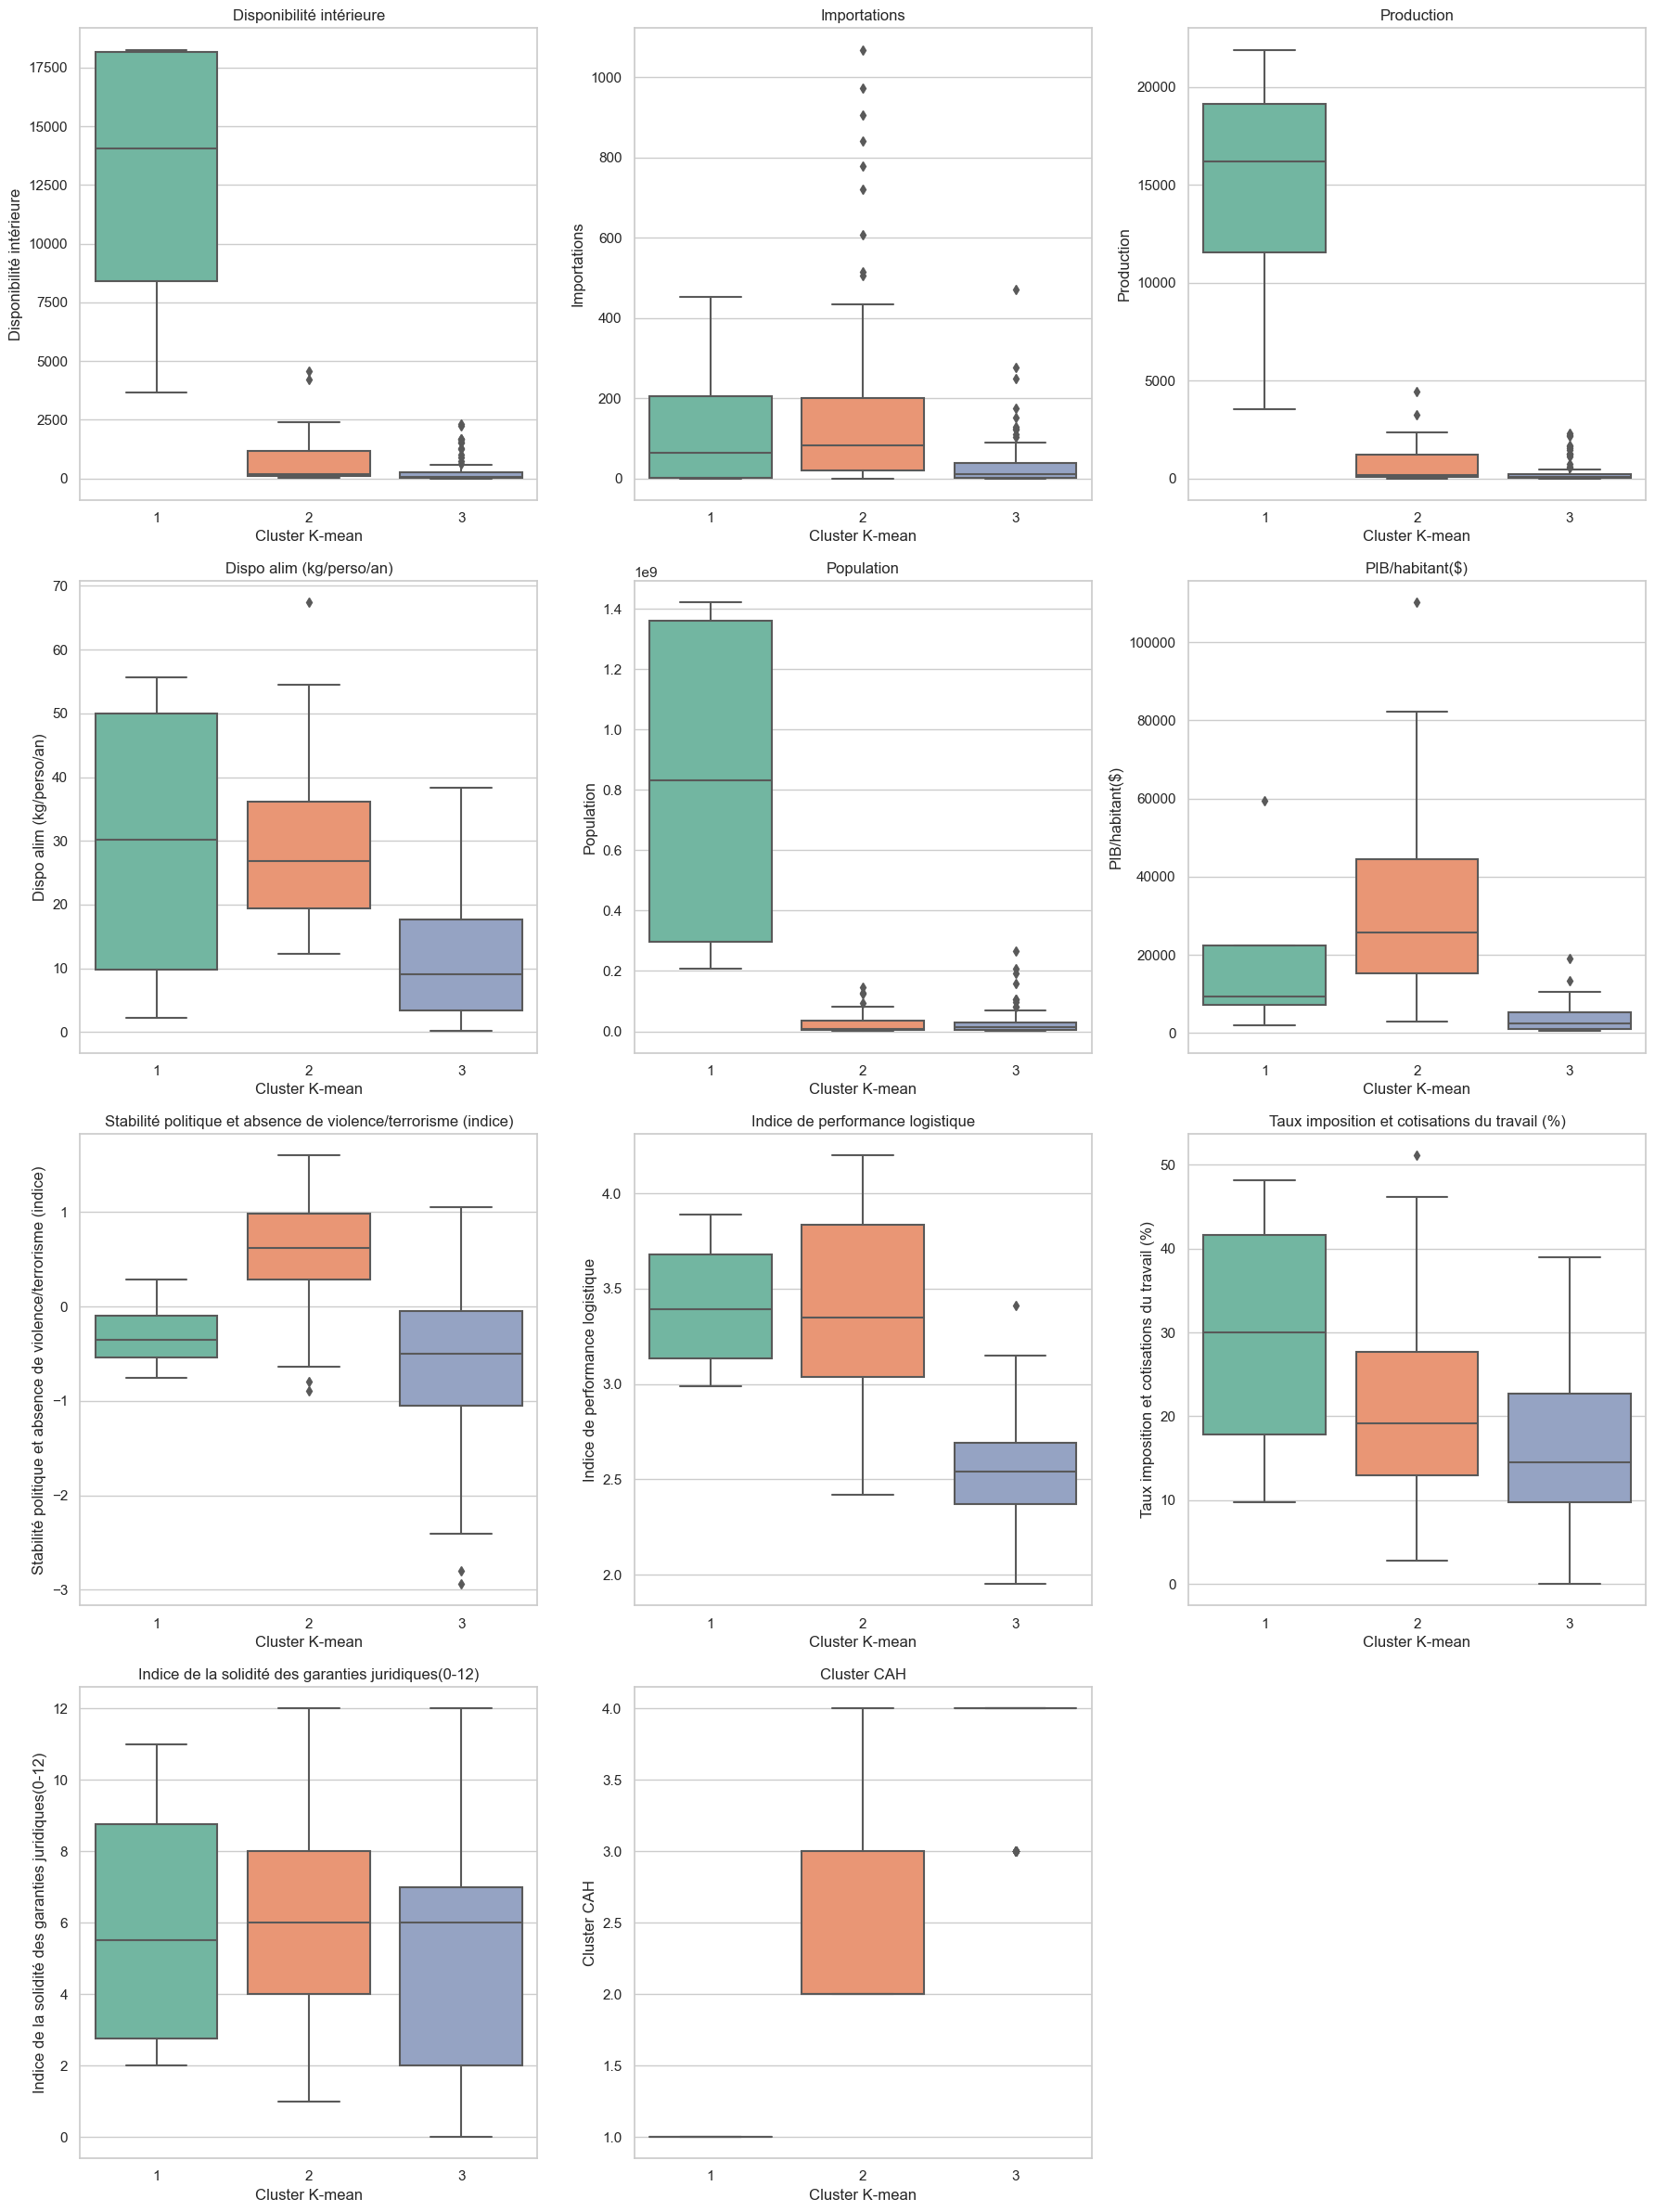

In [18]:
#Création des boxplots

sns.set(style="whitegrid")
num_cols = 3
num_vars = len(DFLapoule.columns) - 1
num_rows = (num_vars + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))
axes = axes.flatten()
for i, col in enumerate(DFLapoule.columns[:-1]):
    sns.boxplot(x='Cluster K-mean', y=col, data=DFLapoule, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

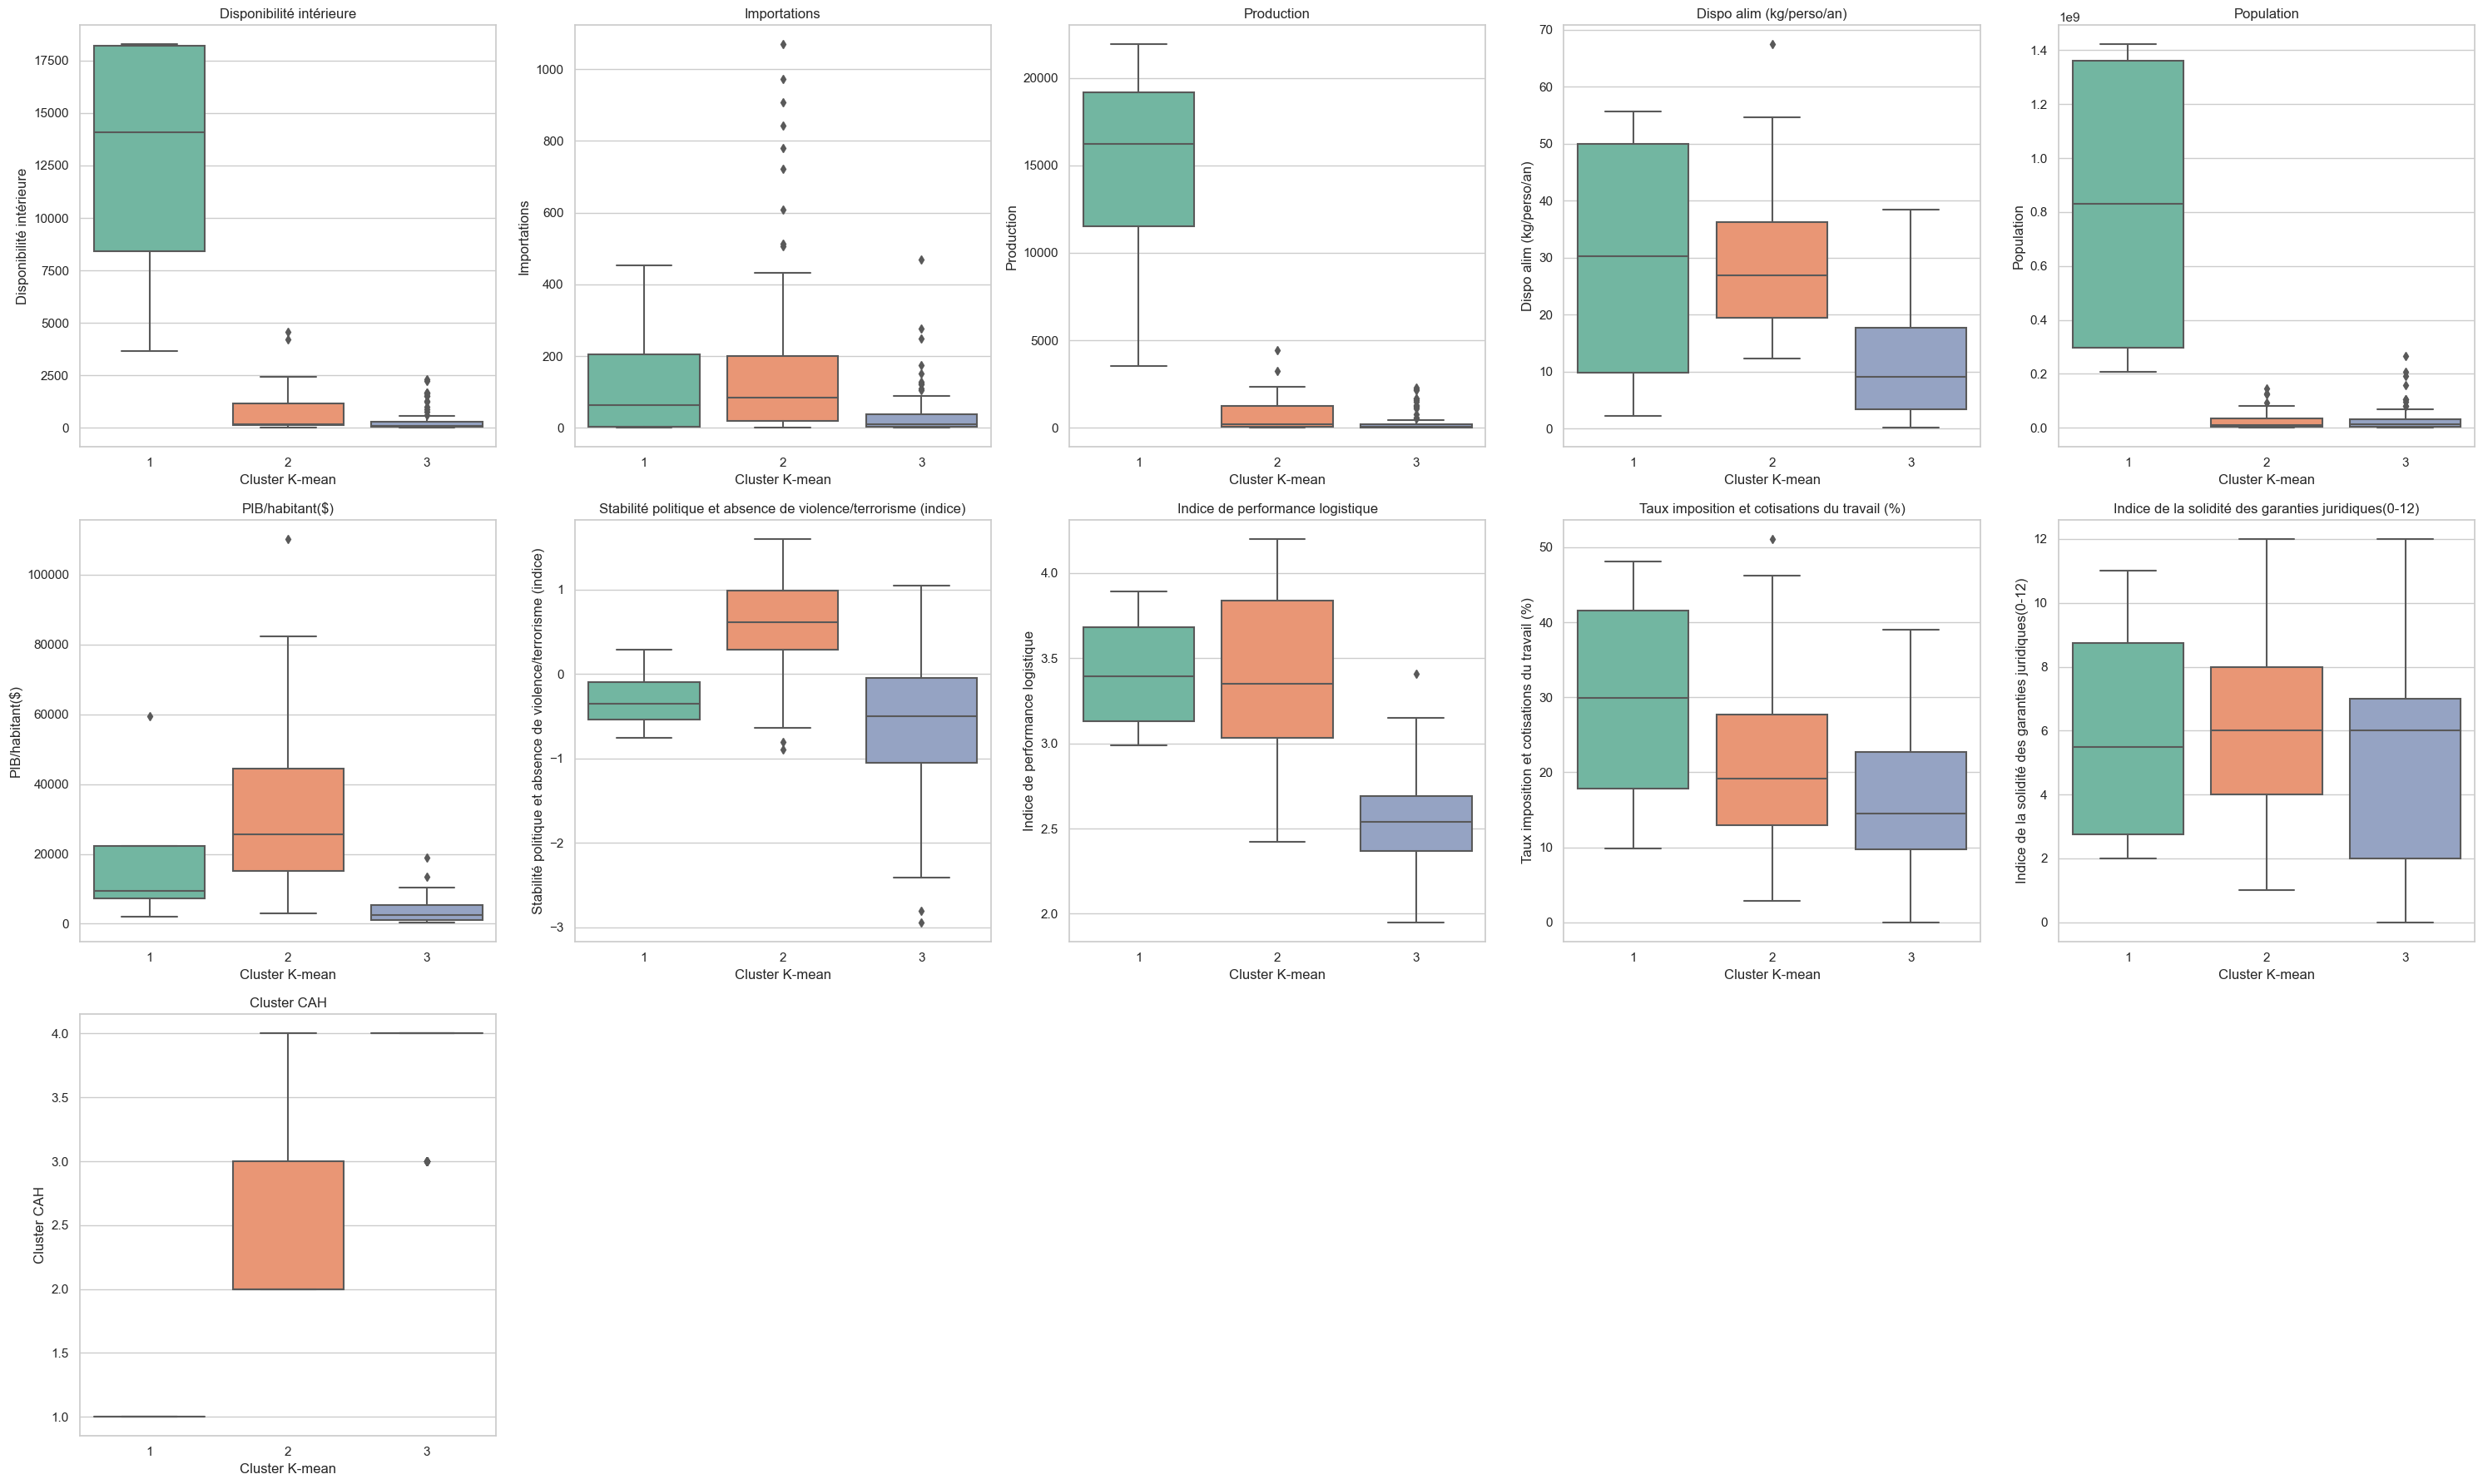

In [20]:
#Création des boxplots

sns.set(style="whitegrid")
num_cols = 5
num_vars = len(DFLapoule.columns) - 1
num_rows = (num_vars + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6))
axes = axes.flatten()
for i, col in enumerate(DFLapoule.columns[:-1]):
    sns.boxplot(x='Cluster K-mean', y=col, data=DFLapoule, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

 Cluster 1

- Énorme disponibilité intérieure/Production/Consommation/Population.

Cluster 2

- Forte importation, PIB (par habitant) élevé,forte consommation, très bon indice de stabilité politique, logistique et juridique, avec des taux d'imposition sur les sociétés intéressants.


Cluster 3

- Ce cluster regroupe des pays en difficulté, loin derrière sur la majorité des indicateurs. Cependant, on peut noter que quelques exceptions s'en sortent bien par rapport à la majorité des pays de ce cluster.

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.4- Analyse en composantes principales (ACP) </h1>
</div>

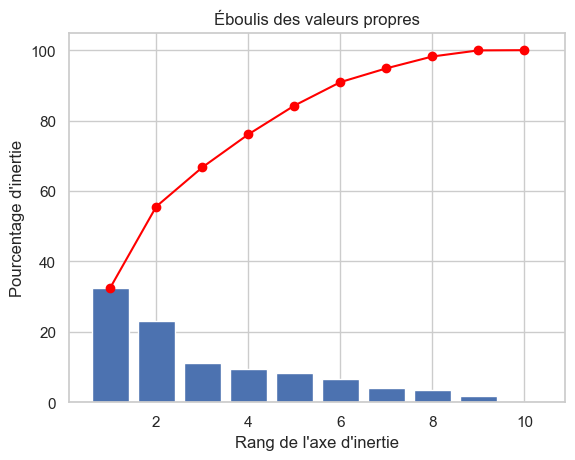

In [21]:
# ACP
pca = PCA()
principal_components = pca.fit_transform(normal_DFLapoule)

# Fonction de l'éboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_ * 100
    plt.bar(np.arange(len(scree)) + 1, scree)
    plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)
    

# afficher le graphique de l'éboulis des valeurs propres
display_scree_plot(pca)

- Le nombre de 6 variables correspond à 90 % de la variance ; au-delà, on récupère très peu d'informations.

In [22]:
# Variance de chacune des variables

print (pca.explained_variance_ratio_)

[0.32514842 0.2307312  0.11125645 0.093611   0.08172608 0.06665683
 0.03924528 0.03365789 0.01733314 0.00063369]


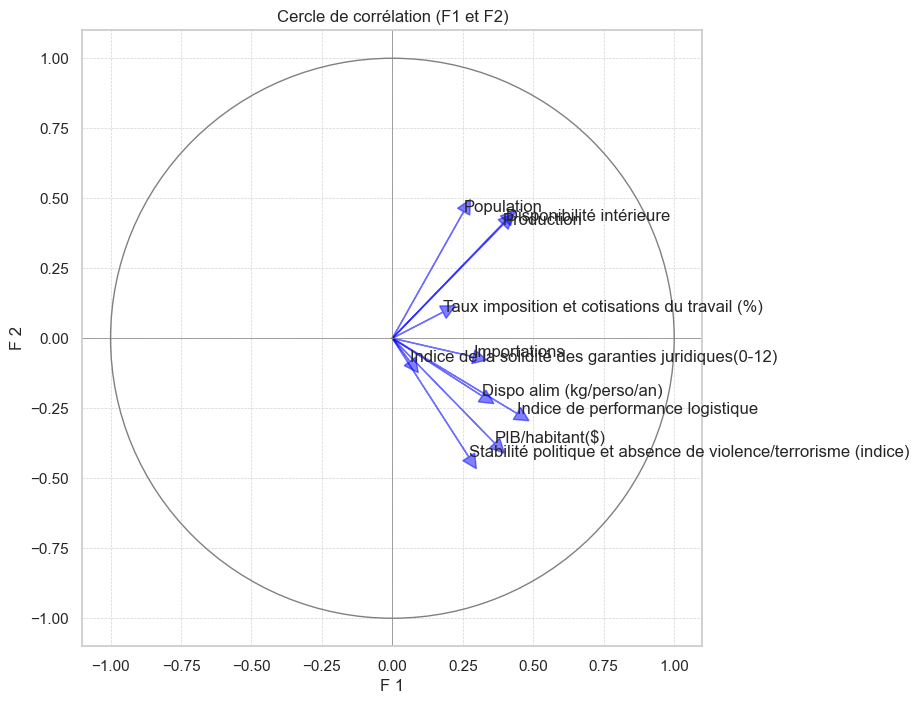

In [23]:
# Création des cercles de corrélations 

def display_correlation_circle(pca, component_1, component_2, feature_names):
    plt.figure(figsize=(8, 8))
    
   
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    plt.gca().add_artist(circle)
    
    components = pca.components_
    for i, (comp1, comp2) in enumerate(zip(components[component_1, :], components[component_2, :])):
        plt.arrow(0, 0, comp1, comp2, color='blue', alpha=0.5, head_width=0.05, head_length=0.05)
        plt.text(comp1, comp2, feature_names[i], fontsize=12)
    
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel(f"F {component_1 + 1}")
    plt.ylabel(f"F {component_2 + 1}")
    plt.title(f"Cercle de corrélation (F{component_1 + 1} et F{component_2 + 1})")
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    plt.show()

# indiquer le noms des variables réel
feature_names = DFLapoule.columns

# Afficher le cercle de corrélation pour les composantes principales F1 et F2
display_correlation_circle(pca, 0, 1, feature_names)




In [24]:
# Coefficients de la deuxième composante principale (F1)
F1 = pca.components_[0]

# Afficher les coefficients de F1 pour chaque variable
print("Coefficients de la première composante principale (F1):")
print()
for feature, coeff in zip(feature_names, F1):
    print(f"{feature}: {coeff}")
print()  
print()
# Coefficients de la deuxième composante principale (F2)
F2 = pca.components_[1]

# Afficher les coefficients de F2 pour chaque variable
print("Coefficients de la deuxième composante principale (F2):")
print()
for feature, coeff in zip(feature_names, F2):
    print(f"{feature}: {coeff}")

Coefficients de la première composante principale (F1):

Disponibilité intérieure: 0.4014663091653147
Importations: 0.28731613006057816
Production: 0.39314458180313555
Dispo alim (kg/perso/an): 0.3183386394163233
Population: 0.2527916966232289
PIB/habitant($): 0.3627796374531506
Stabilité politique et absence de violence/terrorisme (indice): 0.2709635130465669
Indice de performance logistique: 0.4421303188809891
Taux imposition et cotisations du travail (%): 0.17923642411330956
Indice de la solidité des garanties juridiques(0-12): 0.06191320721814074


Coefficients de la deuxième composante principale (F2):

Disponibilité intérieure: 0.41957415181624164
Importations: -0.06613141193589751
Production: 0.4064838009395855
Dispo alim (kg/perso/an): -0.20621704130100424
Population: 0.4520491332458257
PIB/habitant($): -0.37460235334535996
Stabilité politique et absence de violence/terrorisme (indice): -0.4236632651797434
Indice de performance logistique: -0.2686015151708262
Taux imposition et

 Les variables les plus correlées positivement à F1 sont :

- Indice de performance logistique
- Disponibilité Intérieure
- Production
- PIB/habitant ($)
- Dispo alim

 
 Les variables les plus correlées positivement à F2 sont : 

- Population
- Disponibilité Intérieure
- Production

 Les variables les plus correlées négativement F2 sont :

- Stabilité politique et absence de violence/terrorisme (indice)
- Importation
- PIB/habitant ($)




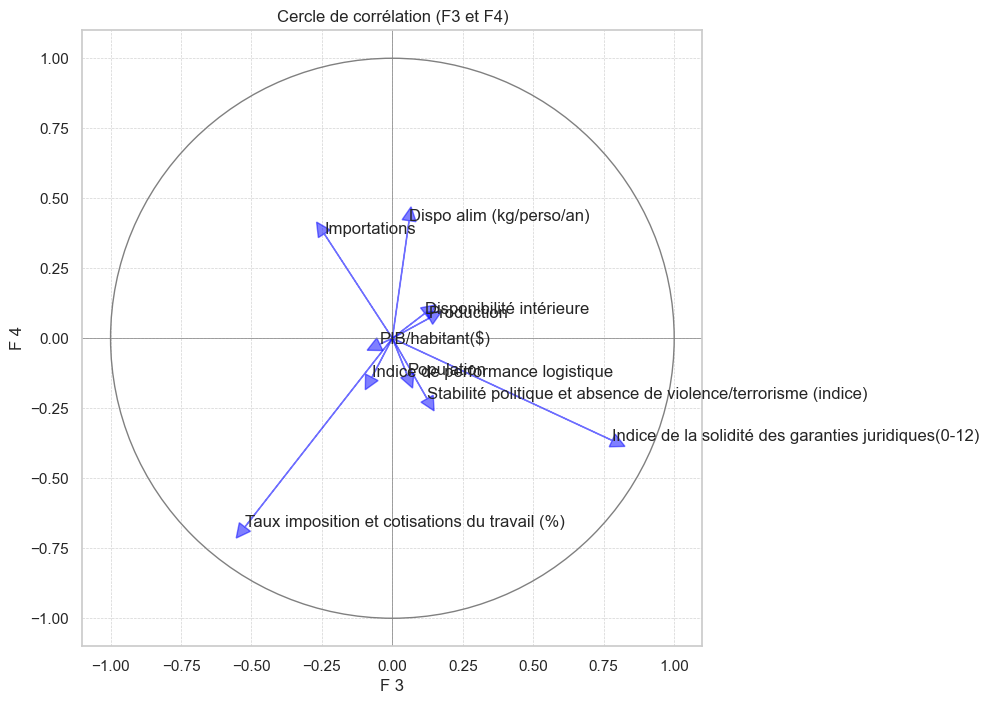

In [25]:
# Afficher le cercle de corrélation pour les composantes principales F3 et F4
display_correlation_circle(pca,2,3, feature_names)

In [26]:
# Coefficients de la deuxième composante principale (F3)
F3 = pca.components_[2]

# Afficher les coefficients de F3 pour chaque variable
print("Coefficients de la première composante principale (F3):")
print()
for feature, coeff in zip(feature_names, F3):
    print(f"{feature}: {coeff}")
print()  
print()
# Coefficients de la deuxième composante principale (F4)
F4 = pca.components_[3]

# Afficher les coefficients de F4 pour chaque variable
print("Coefficients de la deuxième composante principale (F4):")
print()
for feature, coeff in zip(feature_names, F4):
    print(f"{feature}: {coeff}")

Coefficients de la première composante principale (F3):

Disponibilité intérieure: 0.11520791698443496
Importations: -0.24165763909559243
Production: 0.13079463340355105
Dispo alim (kg/perso/an): 0.05930575776392642
Population: 0.05296895497314545
PIB/habitant($): -0.04453271149660307
Stabilité politique et absence de violence/terrorisme (indice): 0.12318604522773505
Indice de performance logistique: -0.07288456454304346
Taux imposition et cotisations du travail (%): -0.5233666756080414
Indice de la solidité des garanties juridiques(0-12): 0.7800742279367079


Coefficients de la deuxième composante principale (F4):

Disponibilité intérieure: 0.08881196228262699
Importations: 0.37297599352359956
Production: 0.07169036409387401
Dispo alim (kg/perso/an): 0.41980624021994045
Population: -0.13161806202631593
PIB/habitant($): -0.02135067463182764
Stabilité politique et absence de violence/terrorisme (indice): -0.2158560895826014
Indice de performance logistique: -0.1395449352647833
Taux impo

 Les variables les plus correlées positivement à F3 sont :

- Indice de la solidité des garanties juridiques(0-12)


 Les variables les plus correlées négativement à F3
    

- Taux imposition et cotisations du travail


 Les variables correlées positivement à F4
    
- Importation
- Dispo alim

 Les variables correlées négativement à F4
    
- Taux imposition et cotisations du travail




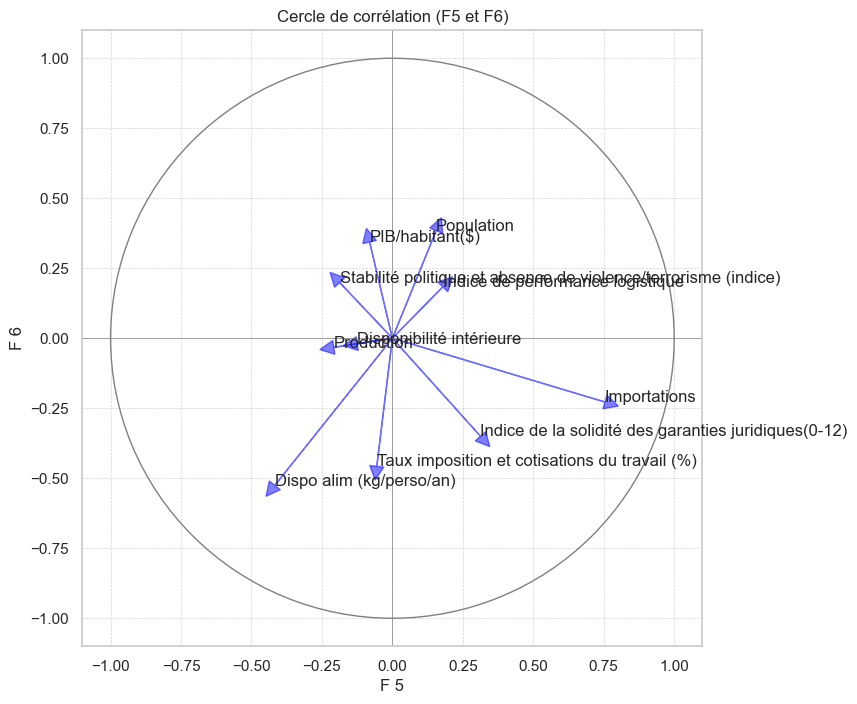

In [27]:
# Afficher le cercle de corrélation pour les composantes principales F5 et F6
display_correlation_circle(pca, 4, 5, feature_names)

In [28]:
# Coefficients de la deuxième composante principale (F3)
F5 = pca.components_[4]

# Afficher les coefficients de F5 pour chaque variable
print("Coefficients de la première composante principale (F5):")
print()
for feature, coeff in zip(feature_names, F5):
    print(f"{feature}: {coeff}")
print()  
print()
# Coefficients de la deuxième composante principale (F4)
F6 = pca.components_[5]

# Afficher les coefficients de F6 pour chaque variable
print("Coefficients de la deuxième composante principale (F6):")
print()
for feature, coeff in zip(feature_names, F6):
    print(f"{feature}: {coeff}")

Coefficients de la première composante principale (F5):

Disponibilité intérieure: -0.12466941495281487
Importations: 0.7542312743280685
Production: -0.20781198171579196
Dispo alim (kg/perso/an): -0.4171932168122548
Population: 0.15536635008089006
PIB/habitant($): -0.0807287429706297
Stabilité politique et absence de violence/terrorisme (indice): -0.18691766983063343
Indice de performance logistique: 0.17882932137088864
Taux imposition et cotisations du travail (%): -0.05526224343983407
Indice de la solidité des garanties juridiques(0-12): 0.3126161099431907


Coefficients de la deuxième composante principale (F6):

Disponibilité intérieure: -0.019048714517734048
Importations: -0.22781741478861425
Production: -0.032634714104893624
Dispo alim (kg/perso/an): -0.5254127348311308
Population: 0.38439173390022485
PIB/habitant($): 0.34355162224089925
Stabilité politique et absence de violence/terrorisme (indice): 0.19898999884760052
Indice de performance logistique: 0.18343106947407836
Taux i

 Les variables correlées positivement à F5

- Importations   
- Indice de la solidité des garanties juridiques(0-12)
 
 Les variables correlées négativement à F5

- Dispo alim (kg/perso/an)


  
 Les variables correlées positivement à F6
    
- Population
- PIB/habitant($)

 Les variables correlées négativement à F6

- Dispo alim (kg/perso/an)    
- Taux imposition et cotisations du travail
- Indice de la solidité des garanties juridiques


<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.5- Recommandation </h1>
</div>

In [29]:
# definir les pays
country_names = DFLapoule.index

# Convertir les composantes principales en DataFrame 
principal_df = pd.DataFrame(principal_components, index=country_names)

top_n = 10

# Afficher les principaux contributeurs pour les six premières composantes
for i in range(6):
    sorted_df = principal_df.iloc[:, i].abs().sort_values(ascending=False).head(top_n)
    
    # Affichage des pays avec les plus grandes contributions
    print(f"Principaux pays contribuant à la Composante F{i+1} :")
    print(sorted_df)
    print("\n")

Principaux pays contribuant à la Composante F1 :
Pays
États-Unis                 9.119472
Chine                      8.905102
Brésil                     4.493846
Japon                      3.735355
Allemagne                  3.293535
Chine, RAS de Hong Kong    3.212880
Royaume-Uni                3.131879
France                     2.859041
Afghanistan                2.774779
Mexique                    2.702414
Name: 0, dtype: float64


Principaux pays contribuant à la Composante F2 :
Pays
Chine                      9.608242
Inde                       5.060556
États-Unis                 4.780752
Brésil                     4.182753
Luxembourg                 3.187585
Chine, RAS de Hong Kong    2.838545
Suisse                     2.735320
Nouvelle-Zélande           2.686697
Danemark                   2.518086
Norvège                    2.513874
Name: 1, dtype: float64


Principaux pays contribuant à la Composante F3 :
Pays
États-Unis           3.758527
Nouvelle-Zélande     2.574704
France

In [30]:
# Calcule du score global pour chaque pays 
normal_DFLapoule['Total_Score'] = normal_DFLapoule[
    ['Disponibilité intérieure', 'Importations', 'Production',
     'Dispo alim (kg/perso/an)', 'Population', 'PIB/habitant($)',
     'Stabilité politique et absence de violence/terrorisme (indice)',
     'Indice de performance logistique',
     'Indice de la solidité des garanties juridiques(0-12)',
     'Taux imposition et cotisations du travail (%)'
    ]
].sum(axis=1)

# Obtenir les 30 premiers pays avec les meilleurs scores 
top_30_countries = normal_DFLapoule.nlargest(30, 'Total_Score')

# Afficher les résultats
print("Top 30 des pays avec les meilleurs scores :")
top_30_countries



Top 30 des pays avec les meilleurs scores :


,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12),Total_Score
Pays,,,,,,,,,,,
Chine,7.410585,1.779069,6.523071,-0.453092,8.299361,-0.282079,-0.081460,1.292115,2.804963,-0.792492,26.500041
États-Unis,7.455395,0.114844,7.901804,2.618979,1.665218,2.276764,0.490959,1.795037,-0.747781,1.834054,25.405273
Brésil,3.920112,-0.492168,5.010514,2.076849,0.955452,-0.234410,-0.345653,0.178500,1.997943,-1.120811,11.946328
Japon,0.690816,4.900123,0.517451,-0.015845,0.469175,1.236267,1.393620,2.046498,0.059239,-0.135856,11.161489
"Chine, RAS de Hong Kong",-0.220317,4.080656,-0.303866,2.465199,-0.258421,1.581191,1.085395,1.848922,-1.165205,0.849099,9.962651
Allemagne,0.402326,3.751858,0.254674,0.052896,0.197715,1.527140,0.821201,2.351844,0.328246,0.192462,9.880363
Mexique,1.460692,4.409455,0.905055,0.977706,0.452677,-0.244694,-0.708919,0.286269,0.717842,1.505735,9.761819
France,0.331484,2.052224,0.343141,0.295969,0.089868,1.313772,0.479951,1.705230,3.083246,-0.464174,9.230711
Royaume-Uni,0.613573,3.433177,0.367132,0.936604,0.101279,1.319345,0.601040,1.974652,-0.645744,0.520781,9.221837


On remarque que la population, la disponibilité et la production énorme du top 3 faussent le résultat du score.

Je préconise des pays avec un fort besoin de volaille, donc une forte importation et une faible production sur place. Un pouvoir d'achat important ainsi que des scores d'indices corrects pour une implantation optimale sont également nécessaires.
Je choisis donc de recommander un top pour différentes régions du monde :

Asiatique
- Japon
- Honk Kong

Europeen
- Allemagne
- Royaume Unis
- Pays-Bas
- Belgique

Americaine 
- Canada
- Mexique

Oriental
- Emirats-arabes-unis

On remarque que tous ces pays appartiennent au Cluster 2 autant avec la méthode CAH que celle du K-Means on les retrouves aussi dans les pays ayant le plus d'inertie avec nos composontes pour l'ACP .